<a href="https://colab.research.google.com/github/wisdom3D/data-analysis-project/blob/main/Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project_On**

**Temperature analysis**    **:) First in the Covid and Malaria series**

**wisdom KOUDAMA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('/content/GlobalLandTemperaturesByCountry.csv')

In [3]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [4]:
df.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe
577461,2013-09-01,NaN,NaN,Zimbabwe


In [5]:
df.shape

(577462, 4)

In [6]:
missing = df.isnull().sum()

In [7]:
missing_perc = missing*100/len(df)

In [8]:
missing_df = pd.DataFrame({'missing' : missing, 'percentage' : missing_perc})

In [9]:
missing_df.style.background_gradient(cmap = 'Spectral')

,missing,percentage
dt,0,0.000000
AverageTemperature,32651,5.654225
AverageTemperatureUncertainty,31912,5.526251
Country,0,0.000000


In [10]:
df.dropna(axis = 'index', how = 'any', subset = ['AverageTemperature'], inplace = True)

In [11]:
df.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [12]:
df['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt'

In [13]:
df['Country'].nunique()

242

In [14]:
dict = {'Denmark (Europe)' : 'Denmark',
        'France (Europe)' : 'France',
        'Congo (Democratic Republic Of The)' : 'Congo',
        'Netherlands (Europe)' : 'Netherlands',
        'United Kingdom (Europe)' : 'United Kingdom'
}

In [15]:
df['Country'].replace(dict, inplace = True)

In [16]:
df['Country'].nunique()

237

In [17]:
data = df.groupby(['Country'])['AverageTemperature'].mean().to_frame()
data = data.reset_index()
data

,Country,AverageTemperature
0,Afghanistan,14.045007
1,Africa,24.074203
2,Albania,12.610646
3,Algeria,22.985112
4,American Samoa,26.611965
...,...,...
232,Western Sahara,22.319818
233,Yemen,26.253597
234,Zambia,21.282956
235,Zimbabwe,21.117547


In [43]:
fig = px.choropleth(data, locations = 'Country', locationmode = 'country names', color = 'AverageTemperature')
fig.update_layout(title= 'Map showing temperature by zone')
fig.show()

In [19]:
global_temp = pd.read_csv('/content/GlobalTemperatures.csv')
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
global_temp['dt'][0].split('-')[0]

'1750'

In [21]:
def fetch_year(date):
  return date.split('-')[0]

In [22]:
global_temp['year'] = global_temp['dt'].apply(fetch_year)

In [23]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [24]:
data_agg = global_temp.groupby('year').agg({'LandAverageTemperature' : 'mean', 'LandAverageTemperatureUncertainty' : 'mean'}).reset_index()
data_agg.head()

,year,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250


In [25]:
data_agg['Uncertainity Top'] = data_agg['LandAverageTemperature'] + data_agg['LandAverageTemperatureUncertainty']
data_agg['Uncertainity Bottom'] = data_agg['LandAverageTemperature'] - data_agg['LandAverageTemperatureUncertainty']

In [26]:
data_agg.head()

,year,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainity Top,Uncertainity Bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


In [27]:
data_agg.columns

Index(['year', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'Uncertainity Top', 'Uncertainity Bottom'],
      dtype='object')

In [44]:
fig = px.line(data_agg, x='year', y = ['LandAverageTemperature',
        'Uncertainity Top', 'Uncertainity Bottom'], title = 'avg Land temp in world')
fig.show()

In [29]:
def get_season(month):
  if month >= 3 and month <= 5:
    return 'spring'
  elif month >= 6 and month <= 8:
    return 'summer'
  elif month >= 9 and month <= 11:
    return 'autumn'
  else:
    return 'winter'

In [30]:
global_temp['dt'] = pd.to_datetime(global_temp['dt'])

In [31]:
global_temp['month'] = global_temp['dt'].dt.month

In [32]:
global_temp.head(2)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2


In [33]:
global_temp['season'] = global_temp['month'].apply(get_season)

In [34]:
global_temp.head(2)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month,season
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,winter
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,winter


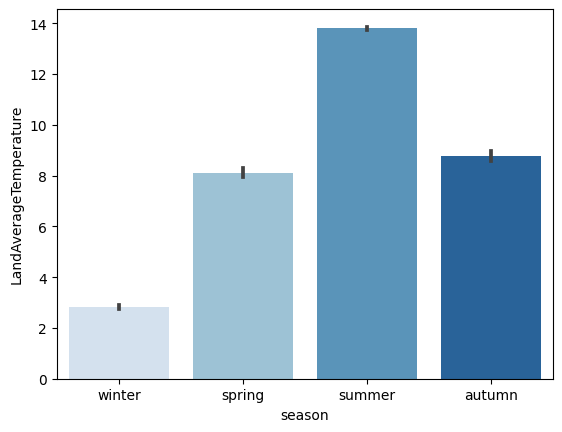

In [36]:
sns.barplot(y = 'LandAverageTemperature' , x = 'season', data = global_temp,  palette = "Blues")
plt.show()

In [39]:
malaria = pd.read_csv('/content/DatasetAfricaMalaria.csv')

In [40]:
malaria.head()

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)


In [45]:
fig = px.choropleth(malaria, locations = 'Country Name', locationmode = 'country names', color = 'Incidence of malaria (per 1,000 population at risk)')
fig.update_layout(title= 'choropleth map')
fig.show()